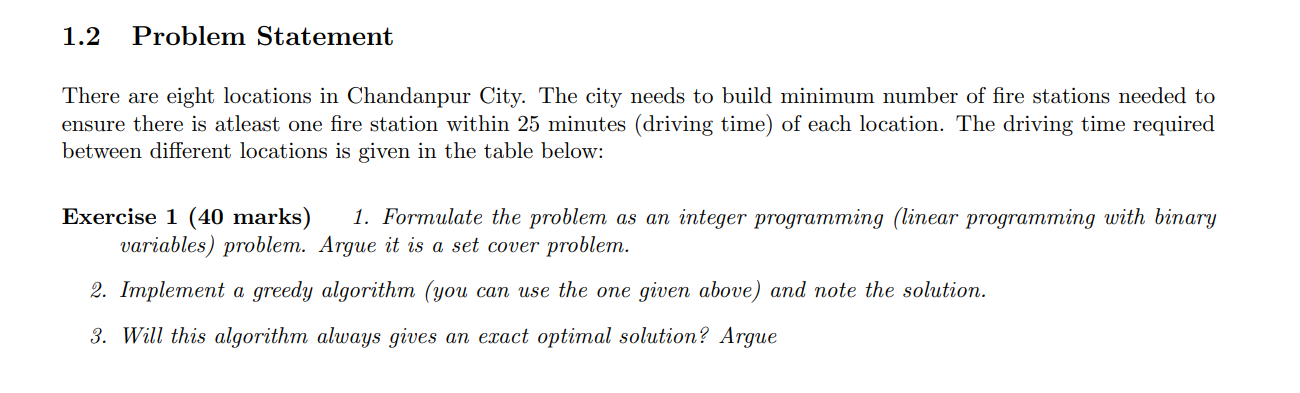

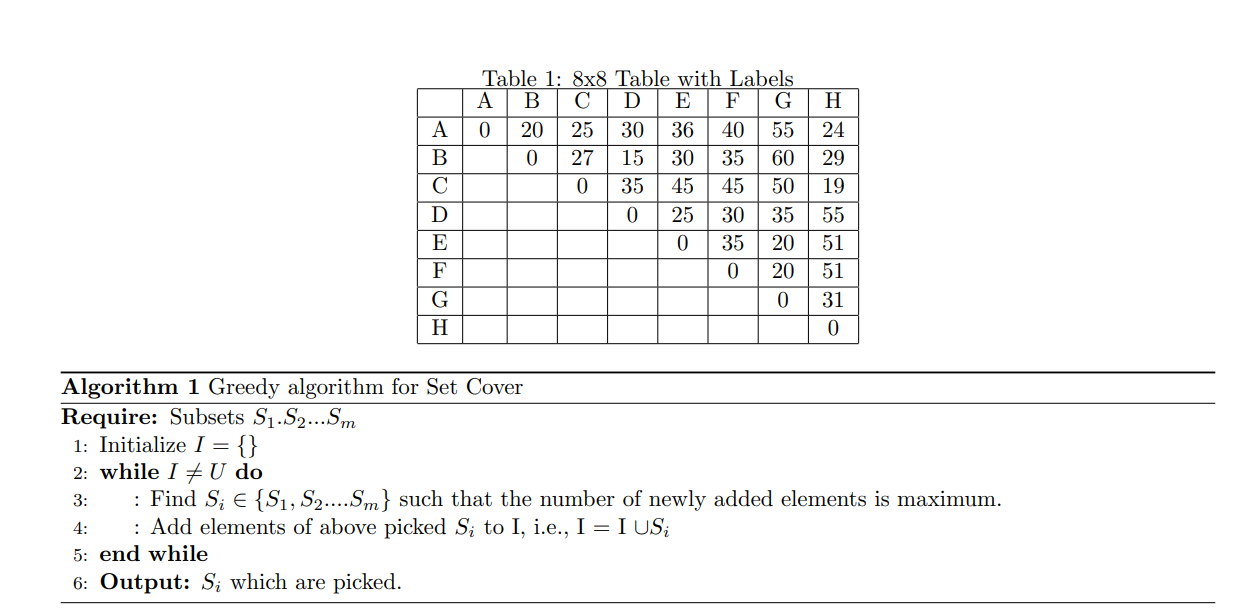

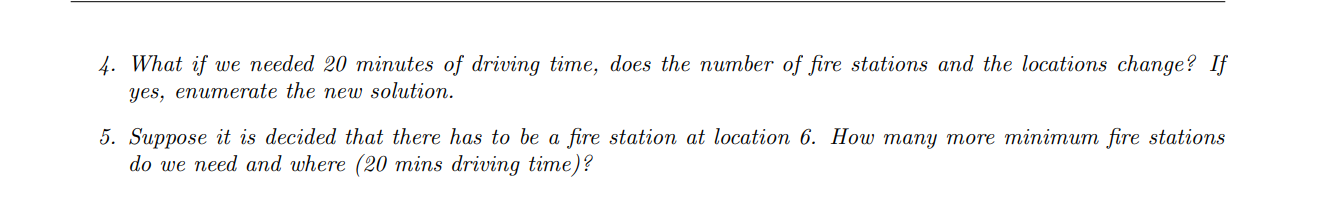

**Question 1**

**Objective:**
\begin{equation*}
\min \sum_{i=1}^{8} x_i
\end{equation*}

**Subject to:**
\begin{equation*}
\sum_{j=1}^{8} a_{ij}x_j \geq 1 \quad \forall \ i = 1,2,...,8
\end{equation*}

**Explanation:**
The objective is to minimize the number of cities chosen to ensure coverage. Each variable $x_i$ represents whether the $i^{th}$ city is selected (1) or not (0). The constraint ensures that for each city ($i$), either the city itself or one of its neighboring cities ($j$) is selected. This is represented by the binary variable $a_{ij}$, where $a_{ij} = 1$ if city $i$ is in the neighborhood of city $j$ and $a_{ij} = 0$ otherwise. Thus, the constraint guarantees coverage for each city within the specified radius.


**or**

To formulate the problem as an integer programming (IP) problem, we can define binary decision variables that represent whether or not to build a fire station at each location. Let $x_i$ be a binary variable where:

$$
x_i = \begin{cases} 1, & \text{if a fire station is built at location } i \\ 0, & \text{otherwise} \end{cases}
$$

The objective is to minimize the number of fire stations built. The constraints ensure that each location is covered within the specified time limit of 25 minutes from at least one fire station.

The problem can be represented as follows:

Objective:
Minimize $\sum_{i} x_i$

Subject to:

For each location $j$, ensure that there is at least one fire station within 25 minutes:
$$
\sum_{i} \text{time}(i, j) \cdot x_i \leq 25
$$

Where:
- $\text{time}(i, j)$ is the driving time between locations $i$ and $j$.
- $x_i$ is the binary decision variable indicating whether a fire station is built at location $i$.

This problem is a set cover problem because we are trying to cover all locations with the minimum number of fire stations. Each fire station covers a set of locations within the specified time limit, and we aim to find the smallest set of fire stations that covers all locations.


In [2]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [3]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:

# Distance matrix
D = [
    [0, 20, 25, 30, 36, 40, 55, 24],
    [20, 0, 27, 15, 30, 35, 60, 29],
    [25, 27, 0, 35, 45, 45, 50, 19],
    [30, 15, 35, 0, 25, 30, 35, 55],
    [36, 30, 45, 25, 0, 35, 20, 51],
    [40, 35, 45, 30, 35, 0, 20, 51],
    [55, 60, 50, 35, 20, 20, 0, 31],
    [24, 29, 19, 55, 51, 51, 31, 0]
]

# Adjacency matrix indicating whether cities are within 25 km radius
A = [
    [1, 1, 1, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [0, 1, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [1, 0, 1, 0, 0, 0, 0, 1]
]

model = ConcreteModel()

# Decision variables
model.x = Var(range(8), domain=Binary)

# Objective function
model.obj = Objective(expr=sum(model.x[i] for i in range(8)), sense=minimize)

# Constraints
model.constraints = ConstraintList()
for i in range(8):
    model.constraints.add(sum(A[i][j] * model.x[j] for j in range(8)) >= 1)

# Solving the model
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
result = solver.solve(model)

# Print decision variable values
try:
    print('Decision Variables for our model:')
    for i in range(8):
        print(f'y{i} :', model.x[i].value)
except:
    print("Problem has a solution other than Optimal.")


Decision Variables for our model:
y0 : 1.0
y1 : 1.0
y2 : 0.0
y3 : 0.0
y4 : 0.0
y5 : 0.0
y6 : 1.0
y7 : 0.0


**Question 2 &3**

**For driving under 25 minutes**

In [5]:
U = {'A','B','C','D','E','F','G','H'}
#if a fire location is at A, the set represents
#the locations reachable under 25 minutes and so on

s1 ={'A','B','C','H'}    #A
s2 ={'B','A','D'}        #B
s3 ={'C','A','H'}        #C
s4 ={'D','B','E'}        #D
s5 ={'E','D','G'}        #E
s6 ={'F','G'}            #F
s7 ={'G','F','E'}        #G
s8 ={'H','C'}            #H

elements =[s1,s2,s3,s4,s5,s6,s7,s8]
I = set()

In [6]:
# U = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}

# # Define the sets representing locations reachable under 25 minutes from each fire location
# reachable_locations = {
#     'A': {'A', 'B', 'C', 'H'},
#     'B': {'A', 'B', 'D'},
#     'C': {'A', 'C', 'H'},
#     'D': {'B', 'D', 'E'},
#     'E': {'D', 'E', 'G'},
#     'F': {'F', 'G'},
#     'G': {'E', 'F', 'G'},
#     'H': {'C', 'H'}
# }

# # Define the initial set
# I = set()

# # Add all reachable locations to the initial set
# for s in reachable_locations.values():
#     I.update(s)

# print("Initial set of reachable locations:", I)


In [7]:
# function to return the set con

# def find_max_elements_not_in_main(main_set, set_list):
#     max_set = set()
#     max_element_count = 0

#     main_union = set().union(*set_list)
#     main_intersection = main_set.intersection(main_union)

#     for s in set_list:
#         not_in_main = s - main_intersection
#         if len(not_in_main) > max_element_count:
#             max_element_count = len(not_in_main)
#             max_set = s

#     return max_set

In [8]:
#define the function max element which is not in the main
def find_max_elements_not_main(main_set, set_list):
    max_set = max(set_list, key=lambda s: len(s - main_set))
    return max_set

# Example usage:
main_set = {'A', 'B', 'C'}
set_list = [{'A', 'B', 'D'}, {'B', 'C', 'E'}, {'C', 'D', 'F'}]
max_elements_not_in_main = find_max_elements_not_main(main_set, set_list)
print("Max set of elements which is not in the main set{}:", max_elements_not_in_main)


Si = []
while I != U:
  Sk = set()
  Sk = find_max_elements_not_main(I, elements)
  Si.append(Sk)
  I.update(Sk)

print('Here is the fire station :',Si)


Max set of elements which is not in the main set{}: {'C', 'F', 'D'}
Here is the fire station : [{'C', 'H', 'B', 'A'}, {'E', 'G', 'D'}, {'F', 'G'}]


**Observation:-**From the iteration we find that, there will be three fire stations at A , E and F

**Question 4**

**driving for  20 minutes**

In [9]:
U = {'A','B','C','D','E','F','G','H'}
#if a fire location is at A, the set represents
#the locations reachable under 25 minutes and so on

s1 ={'A','B'}    #A
s2 ={'B','A','D'}#B
s3 ={'C','H'}     #C
s4 ={'D','B'}     #D
s5 ={'E','G'}      #E
s6 ={'F','G'}      #F
s7 ={'G','F','E'}  #G
s8 ={'H','C'}      #H
print('..................................23n0464')
elements =[s1,s2,s3,s4,s5,s6,s7,s8]
I = set()
Si = []  #store the set
while I != U:
  Sk = set() #define the set
  Sk = find_max_elements_not_main(I, elements)
  Si.append(Sk)
  I.update(Sk)
print('Here ids the fire station :',Si)

..................................23n0464
Here ids the fire station : [{'A', 'B', 'D'}, {'F', 'E', 'G'}, {'C', 'H'}]


**Observation:-**Therefore there will be three fire stations at B , G and H .Thus the fire stations changed when the distance should be under 20 minutes

**Question 5**

In [10]:
elements =[s1,s2,s3,s4,s5,s6,s7,s8]
G = s6   # Location 6 read as Location G.
Si = []
while G != U:
  Sj = set()
  Sj = find_max_elements_not_main(G, elements)
  Si.append(Sj)
  G.update(Sj)
print('Find the minimum station ',Si)

Find the minimum station  [{'A', 'B', 'D'}, {'C', 'H'}, {'E', 'G'}]


**Observation:-**Hence from the above iteration we find that the There we will need a minimum 3 more fire stations at B, C and E